<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-2/vitalfew-graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from scipy.stats import skew, kurtosis

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (19.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [7]:
df_raw = pd.read_excel('/content/mydrive/MyDrive/1. 실습데이터 설명(Data Dictionary).xlsx', sheet_name = 'SCALE불량')

print(df_raw.shape)
df_raw.head()

(720, 21)


,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707.0,15109.0,14180.0,1호기,...,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,적용,8.0,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707.0,15109.0,14180.0,1호기,...,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,적용,8.0,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619.0,19181.0,18130.0,2호기,...,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,적용,8.0,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619.0,19181.0,18130.0,2호기,...,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,적용,8.0,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098.0,13334.0,12430.0,3호기,...,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,적용,8.0,1조


In [8]:
df_raw['FUR_NO_ROW'] = df_raw['FUR_NO_ROW'].astype('object')

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    float64
 7   PT_LTH             720 non-null    float64
 8   PT_WGT             720 non-null    float64
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    float64
 12  FUR_HZ_TIME        720 non-null    float64
 13  FUR_SZ_TEMP        720 non-null    float64
 14  FUR_SZ_TIME        720 non-null    float64
 15  FUR_TIME           720 non-null    float64
 16  FUR_EXTEMP         720 non

**결측치 확인하기**

In [10]:
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

데이터셋에 결측치는 없는 것으로 보인다.

**이상치 처리하기**

In [14]:
# 연속형 변수와 범주형 변수 나누기

df_raw_num = df_raw[['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
                    'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME',
                    'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING']]

df_raw_cat = df_raw[['STEEL_KIND', 'FUR_NO', 'FUR_NO_ROW', 'HSB', 'WORK_GR']]                    

In [15]:
print(df_raw_num.shape)
df_raw_num.head()

(720, 12)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,8.0
1,32.25,3707.0,15109.0,14180.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,8.0
2,33.27,3619.0,19181.0,18130.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,8.0
3,33.27,3619.0,19181.0,18130.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,8.0
4,38.33,3098.0,13334.0,12430.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,8.0


In [16]:
print(df_raw_cat.shape)
df_raw_cat.head()

(720, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T1,1호기,1.0,적용,2조
1,T1,1호기,2.0,적용,2조
2,T8,2호기,1.0,적용,3조
3,T8,2호기,2.0,적용,3조
4,T8,3호기,1.0,적용,1조


In [93]:
# 각 변수의 이상치가 가지는 인덱스값 반환

def outlier_idx_detection(data) :

    outlier_indices = []
    for col in data.columns :
        q1, q3 = np.percentile(data[col], [25, 75])
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR

        outlier_idx = data[(data[col] < lower) | (data[col] > upper)].index
        outlier_indices.append(list(outlier_idx))

    outlier_index = []
    for lst in outlier_indices :
        for i in range(len(lst)) :
            outlier_index.append(lst[i])

    return list(set(outlier_index))


len(outlier_idx_detection(df_raw_num))

118

In [94]:
df_raw_num.drop(outlier_idx_detection(df_raw_num), axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
print(df_raw_num.shape)
df_raw_num.head()

(602, 12)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,8.0
1,32.25,3707.0,15109.0,14180.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,8.0
2,33.27,3619.0,19181.0,18130.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,8.0
3,33.27,3619.0,19181.0,18130.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,8.0
4,38.33,3098.0,13334.0,12430.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,8.0


In [18]:
df_raw_num.describe().round(2)

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00
mean,29.27,2807.13,34323.27,41481.78,1155.34,88.53,1149.67,78.80,300.56,1149.67,933.92,8.32
std,19.15,517.84,13828.43,24751.32,20.87,37.66,17.57,36.42,45.39,17.57,107.86,1.62
min,12.03,1800.00,7893.00,7820.00,1103.00,43.00,1113.00,35.00,221.00,1113.00,0.00,5.00
25%,16.09,2466.00,22663.00,17757.50,1139.00,65.00,1132.00,57.75,257.00,1132.00,889.75,6.00
50%,20.13,2725.00,37380.00,36120.00,1158.00,75.00,1155.00,67.50,304.00,1155.00,951.00,8.00
75%,40.00,3125.00,43735.00,61120.00,1171.00,101.00,1164.00,86.00,342.00,1164.00,994.25,10.00
max,100.34,4575.00,54917.00,115080.00,1206.00,312.00,1185.00,294.00,398.00,1185.00,1078.00,10.00


PT_THK, PT_WGT, FUR_HZ_TIME, FUR_SZ_TIME은 분포가 한쪽으로 치우쳐 있는 것으로 파악된다.

In [ ]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()

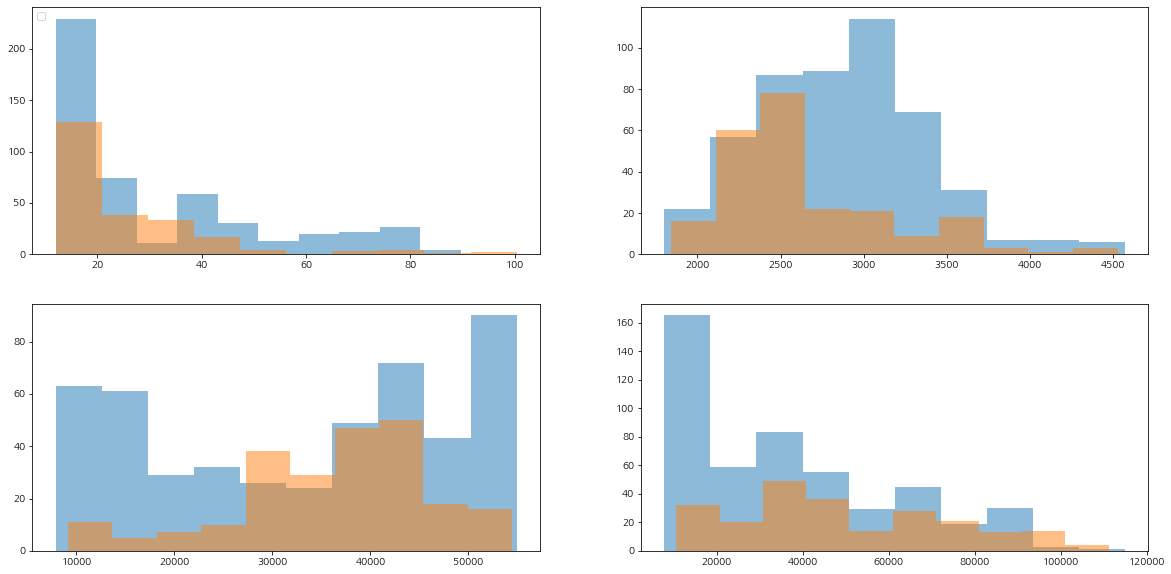

In [ ]:
# PT_THK, PT_WDTH, PT_LTH, PT_WGT
# Plate(후판) 지시두께, 지시폭, 지시길이, 지시중량


fig1,ax1 =plt.subplots(2,2, figsize = (20,10))

ax1[0,0].hist(dat[dat['SCALE'] == '양품']['PT_THK'], alpha=0.5)
ax1[0,0].hist(dat[dat['SCALE'] == '불량']['PT_THK'], alpha=0.5)
ax1[0,0].legend(loc='upper left')

ax1[0,1].hist(dat[dat['SCALE'] == '양품']['PT_WDTH'], alpha=0.5)
ax1[0,1].hist(dat[dat['SCALE'] == '불량']['PT_WDTH'], alpha=0.5)

ax1[1,0].hist(dat[dat['SCALE'] == '양품']['PT_LTH'], alpha=0.5)
ax1[1,0].hist(dat[dat['SCALE'] == '불량']['PT_LTH'], alpha=0.5)

ax1[1,1].hist(dat[dat['SCALE'] == '양품']['PT_WGT'], alpha=0.5)
ax1[1,1].hist(dat[dat['SCALE'] == '불량']['PT_WGT'], alpha=0.5)

plt.show()

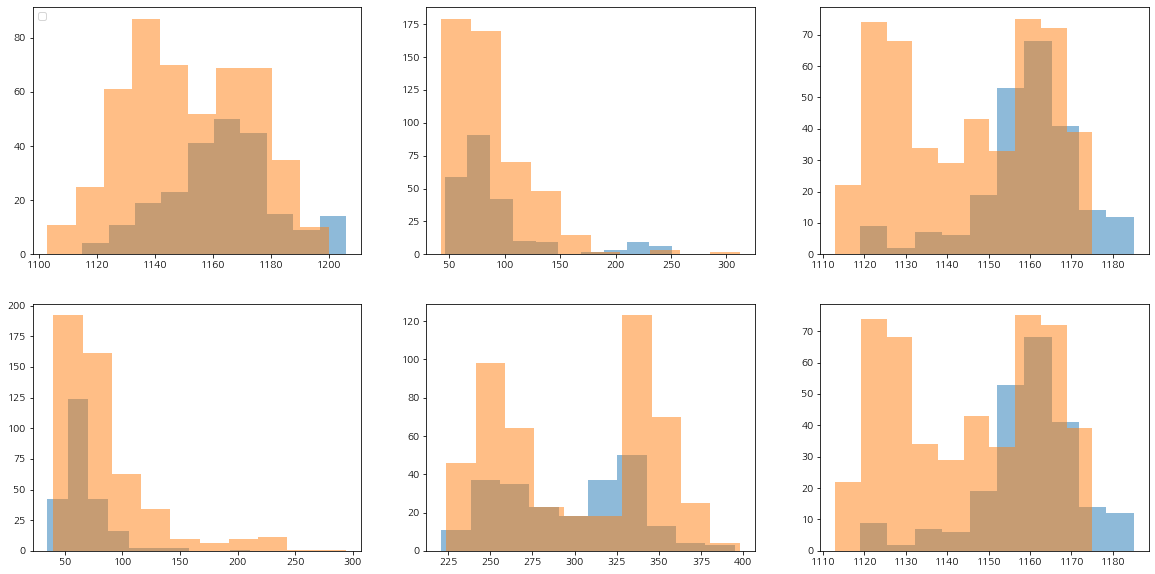

In [ ]:
# FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_TIME, FUREXTEMP
# 가열로 가열대 소재온도, 가열로 가열대 재로시간, 가열로 균열대 소재온도, 가열로 균열대 재로시간, 가열로 재로시간, 가열로 추출온도(계산치)


fig2,ax2 =plt.subplots(2, 3, figsize = (20,10))

ax2[0,0].hist(dat[dat['SCALE'] == '불량']['FUR_HZ_TEMP'], alpha=0.5)
ax2[0,0].hist(dat[dat['SCALE'] == '양품']['FUR_HZ_TEMP'], alpha=0.5)
# ax2[0,0].legend(loc = 'upper left')

ax2[0,1].hist(dat[dat['SCALE'] == '불량']['FUR_HZ_TIME'], alpha=0.5)
ax2[0,1].hist(dat[dat['SCALE'] == '양품']['FUR_HZ_TIME'], alpha=0.5)

ax2[0,2].hist(dat[dat['SCALE'] == '불량']['FUR_SZ_TEMP'], alpha=0.5)
ax2[0,2].hist(dat[dat['SCALE'] == '양품']['FUR_SZ_TEMP'], alpha=0.5)

ax2[1,0].hist(dat[dat['SCALE'] == '불량']['FUR_SZ_TIME'], alpha=0.5)
ax2[1,0].hist(dat[dat['SCALE'] == '양품']['FUR_SZ_TIME'], alpha=0.5)

ax2[1,1].hist(dat[dat['SCALE'] == '불량']['FUR_TIME'], alpha=0.5)
ax2[1,1].hist(dat[dat['SCALE'] == '양품']['FUR_TIME'], alpha=0.5)

ax2[1,2].hist(dat[dat['SCALE'] == '불량']['FUR_EXTEMP'], alpha=0.5)
ax2[1,2].hist(dat[dat['SCALE'] == '양품']['FUR_EXTEMP'], alpha=0.5)

plt.show()

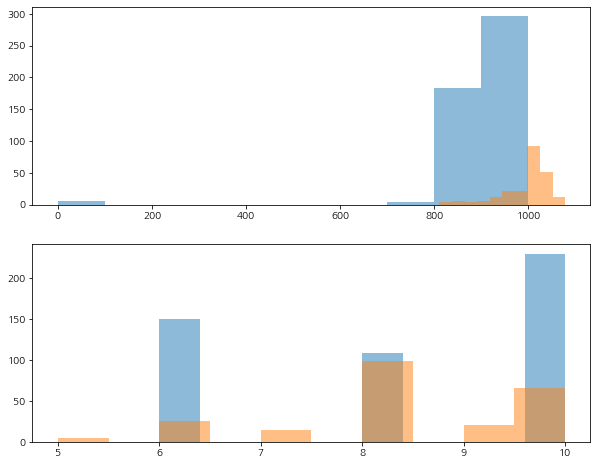

In [ ]:
# ROLLING_TEMP_T5, ROLLING_DESCALING
# 압연온도, 압연 descaling 함수


fig3,ax3 =plt.subplots(2,1, figsize = (10,8))

ax3[0].hist(dat[dat['SCALE'] == '양품']['ROLLING_TEMP_T5'], alpha=0.5)
ax3[0].hist(dat[dat['SCALE'] == '불량']['ROLLING_TEMP_T5'], alpha=0.5)

ax3[1].hist(dat[dat['SCALE'] == '양품']['ROLLING_DESCALING'], alpha=0.5)
ax3[1].hist(dat[dat['SCALE'] == '불량']['ROLLING_DESCALING'], alpha=0.5)

plt.show()

In [ ]:
dat_for_vis = pd.DataFrame()
dat_for_vis['']

In [ ]:
df = pd.DataFrame({'Lee, JM':  [47.8, 46.3, 60.5, 52.4, 30.8],
                   'Yoon, SY': [45.5, 48.1, 35.4, 43.9, 67.1]}, 
                   index=['<=29', '30~39', '40~49', '50~59', '>=60'])
df.plot.bar(rot=0, xlabel="연령대", ylabel="지지율(%)", title="20대 대선 연령별 득표율 결과")

<BarContainer object of 720 artists>

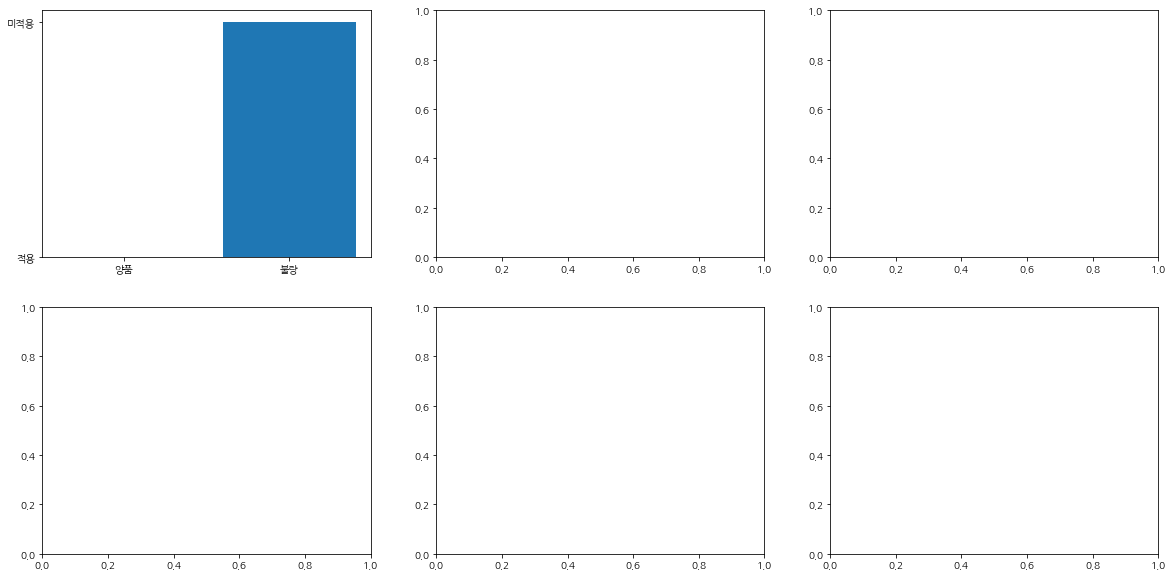

In [ ]:
fig2,ax2 =plt.subplots(2, 3, figsize = (20,10))

ax2[0,0].bar(dat['SCALE'], dat['HSB'])
# ax2[0,0].hist(dat[dat['SCALE'] == '불량']['FUR_HZ_TEMP'], alpha=0.5)
# ax2[0,0].hist(dat[dat['SCALE'] == '양품']['FUR_HZ_TEMP'], alpha=0.5)
# # ax2[0,0].legend(loc = 'upper left')

# ax2[0,1].hist(dat[dat['SCALE'] == '불량']['FUR_HZ_TIME'], alpha=0.5)
# ax2[0,1].hist(dat[dat['SCALE'] == '양품']['FUR_HZ_TIME'], alpha=0.5)

In [ ]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"], columns = data[var], normalize = "columns").round(3))

In [ ]:
fun_print_crosstab(dat, 'STEEL_KIND')

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
불량          212   1   1   2   2   0   2   6   5
양품          291   0   6  14  16   2  41  29  90

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
불량          0.421  1.0  0.143  0.125  0.111  0.0  0.047  0.171  0.053
양품          0.579  0.0  0.857  0.875  0.889  1.0  0.953  0.829  0.947


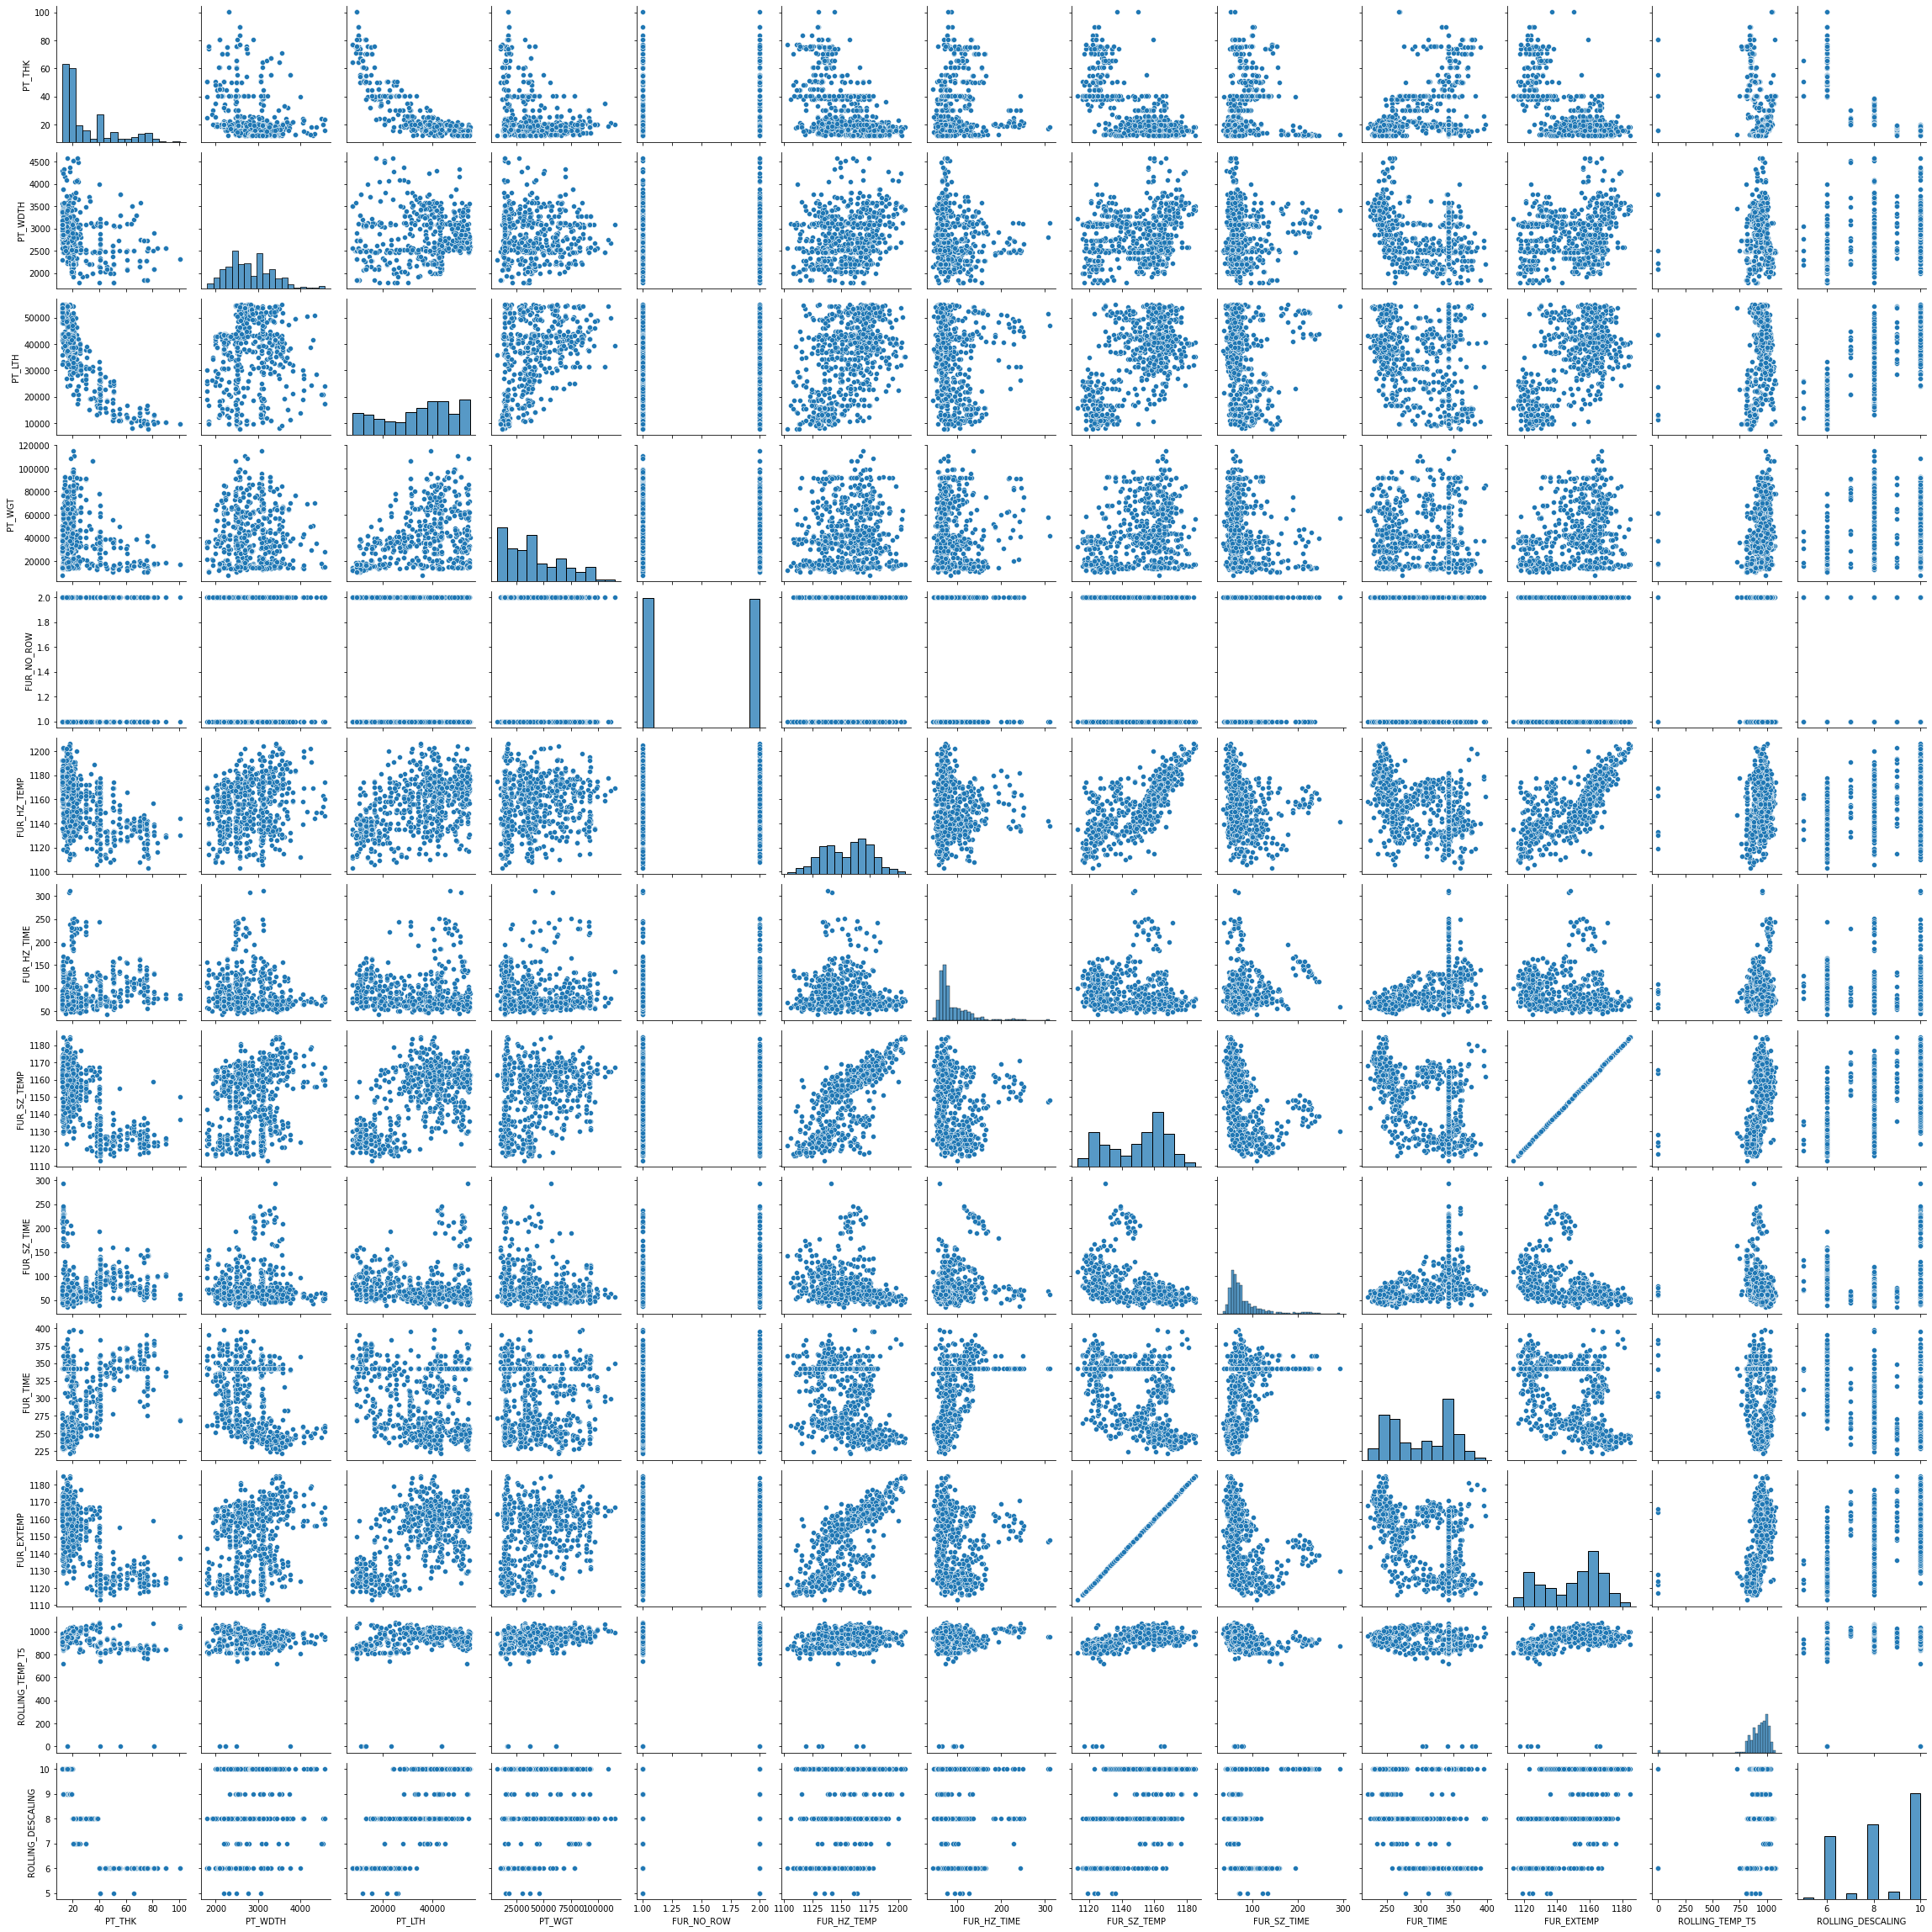

In [ ]:
sns.pairplot(dat)